In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.mlab as mlab

"exec(% matplotlib inline)"

'exec(% matplotlib inline)'

In [5]:
# loading the dataset
disease_df = pd.read_csv("dataset/framingham.csv")
disease_df.drop(['education'], axis=1, inplace=True)
disease_df.rename(columns={"male":"Gender_male"}, inplace=True)
disease_df.head()

,Gender_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender_male      4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


In [7]:
# handling missing values
disease_df.dropna(axis=0, inplace=True)
disease_df.shape

(3751, 15)

In [8]:
disease_df["TenYearCHD"].value_counts()

TenYearCHD
0    3179
1     572
Name: count, dtype: int64

In [13]:
X = np.asarray(disease_df[list(disease_df.columns)[:-1]])
y = np.asarray(disease_df["TenYearCHD"])

# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (2625, 14) (2625,)
Test set: (1126, 14) (1126,)


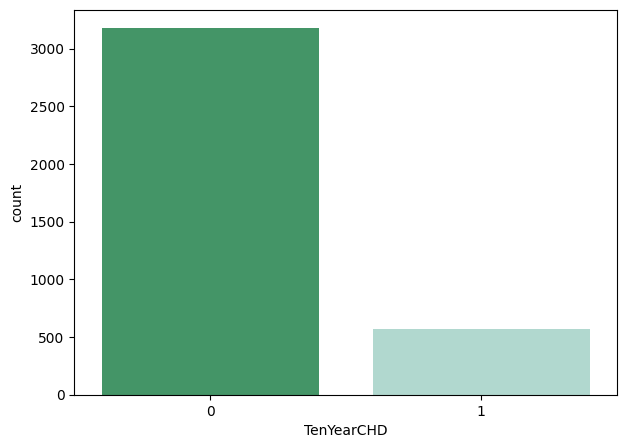

In [15]:
# Exploratory data analysis of heart disease dataset
# counting number of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x="TenYearCHD", data=disease_df, palette="BuGn_r", hue="TenYearCHD", legend=False)
plt.show()

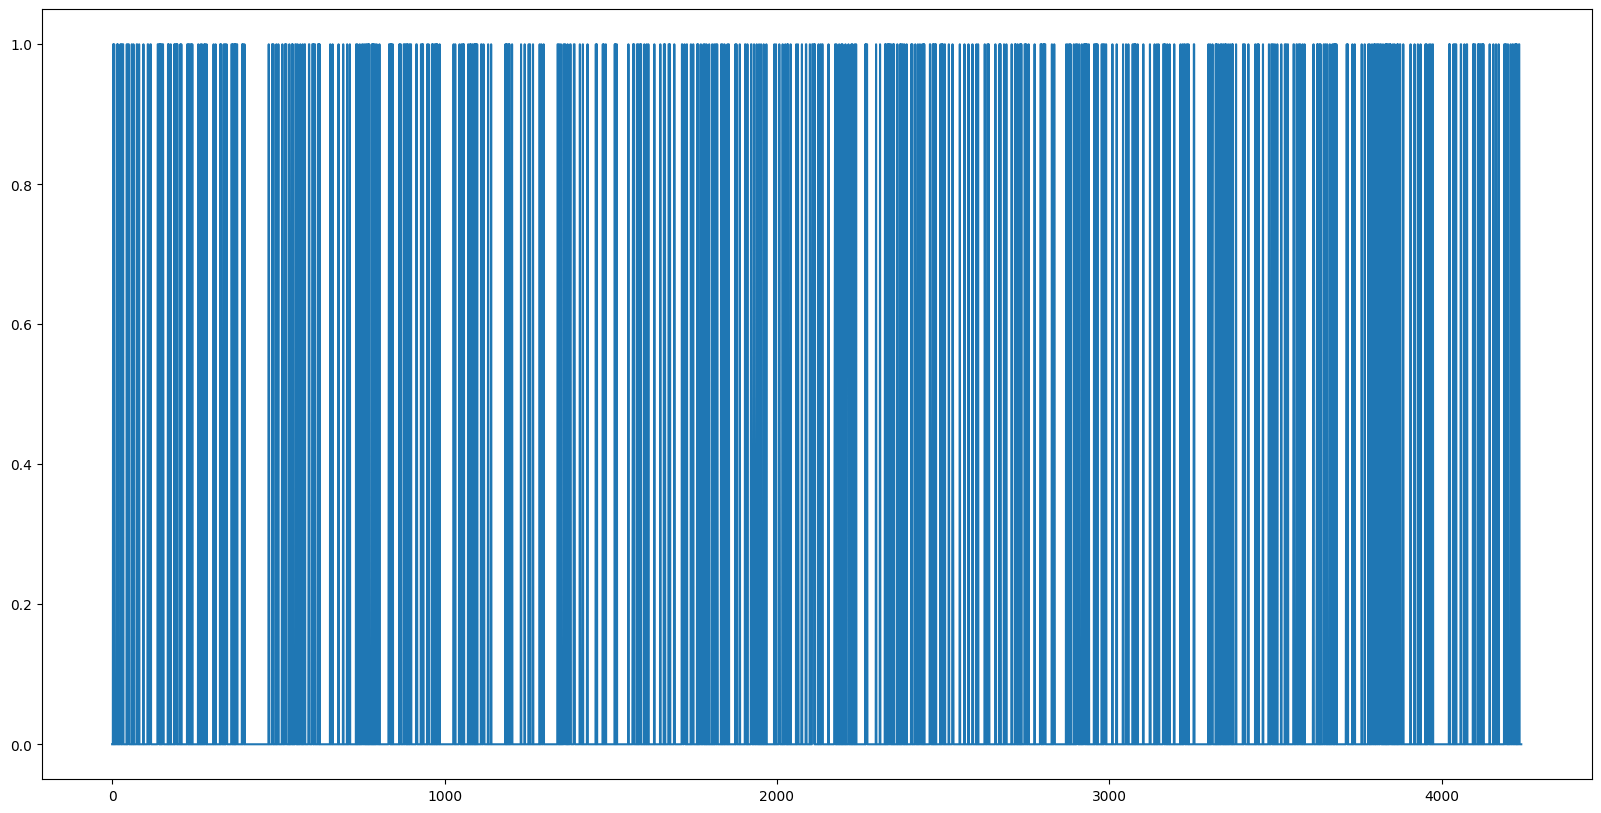

In [17]:
# counting number of patients affected by CHD where (0=Not Affected, 1=Affected)
plt.figure(figsize=(20, 10))
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

In [19]:
# fitting logistic regression model for heart disease prediction
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [22]:
# evaluating logistic regression model
print(f"Accuracy of the model is: {accuracy_score(y_test, y_pred) * 100} %")

Accuracy of the model is: 85.2575488454707


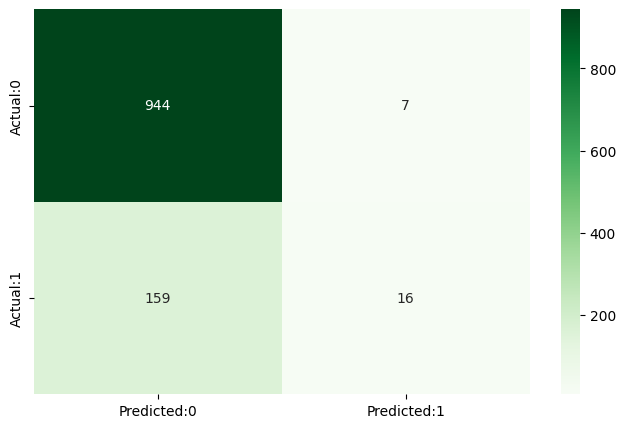

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       951
           1       0.70      0.09      0.16       175

    accuracy                           0.85      1126
   macro avg       0.78      0.54      0.54      1126
weighted avg       0.83      0.85      0.80      1126



In [27]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(cm, columns=["Predicted:0", "Predicted:1"], index=["Actual:0", "Actual:1"])

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens")
plt.show()
print("The details for confusion matrix is =")
print(classification_report(y_test, y_pred))